**LIBRERIAS**

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim #lo utilizamos y para saber la latitud y longitud de una ubicación
import time #importamos esta libreria para utilizarla junto a la libreria de geopy para poder hacer pedidos de acuerdos a los segundos puesto
import re #importamos esta libreria para analizar y comparar str

**IMPORTAMOS EL ARCHIVO OBLIGATORIO**

In [3]:
df_accidentes_aviones = pd.read_csv('AccidentesAviones.csv',index_col=0)

**ANALIZAMOS LA CANTIDAD DE COLUMNAS Y FILAS QUE TIENE EL DF**

In [4]:
df_accidentes_aviones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha                   5008 non-null   object
 1   HORA declarada          5008 non-null   object
 2   Ruta                    5008 non-null   object
 3   OperadOR                5008 non-null   object
 4   flight_no               5008 non-null   object
 5   route                   5007 non-null   object
 6   ac_type                 5008 non-null   object
 7   registration            5008 non-null   object
 8   cn_ln                   5008 non-null   object
 9   all_aboard              5008 non-null   object
 10  PASAJEROS A BORDO       5008 non-null   object
 11  crew_aboard             5008 non-null   object
 12  cantidad de fallecidos  5008 non-null   object
 13  passenger_fatalities    5008 non-null   object
 14  crew_fatalities         5008 non-null   object
 15  ground   

**ANALIZAMOS EL DF**

In [5]:
df_accidentes_aviones.head()

fecha HORA declarada                                Ruta  \
0  September 17, 1908           1718                 Fort Myer, Virginia   
1  September 07, 1909              ?             Juvisy-sur-Orge, France   
2       July 12, 1912           0630           Atlantic City, New Jersey   
3     August 06, 1913              ?  Victoria, British Columbia, Canada   
4  September 09, 1913           1830                  Over the North Sea   

                 OperadOR flight_no          route                 ac_type  \
0    Military - U.S. Army         ?  Demonstration        Wright Flyer III   
1                       ?         ?       Air show          Wright Byplane   
2    Military - U.S. Navy         ?    Test flight               Dirigible   
3                 Private         ?              ?        Curtiss seaplane   
4  Military - German Navy         ?              ?  Zeppelin L-1 (airship)   

  registration cn_ln all_aboard PASAJEROS A BORDO crew_aboard  \
0            ?     1          2                 1           1   
1          SC1     ?          1                 0           1   
2            ?     ?          5                 0           5   
3            ?     ?          1                 0           1   
4            ?     ?         20                 ?           ?   

  cantidad de fallecidos passenger_fatalities crew_fatalities ground  \
0                      1                    1               0      0   
1                      1                    0               0      0   
2                      5                    0               5      0   
3                      1                    0               1      0   
4                     14                    ?               ?      0   

                                             summary  
0  During a demonstration flight, a U.S. Army fly...  
1  Eugene Lefebvre was the first pilot to ever be...  
2  First U.S. dirigible Akron exploded just offsh...  
3  The first fatal airplane accident in Canada oc...  
4  The airship flew into a thunderstorm and encou...

* A primera vista lo primero que deberiamos modificar son las fechas -al parcer todas tienen el mismo formato "mes", "fecha", "," y "año"
* El 30% de las horas declaradas no esta declarada, tiene un ´?´
* Algún que otro valor de 'OperadOR' tiene como valor un ´?´
* El 70% de la columna 'flight_no' tiene un ´?´
* 'route' tiene muchos valores vacios
* 'regristration' y 'cn_In' tienen muchos valores ´?´
* 'all_board', 'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities', 'crew_fatalities', 'ground' y 'summary' tienen algunos valores en ´?´


Aqui hay algo muy interesante a analizar, tenemos 'cantidad de fallecidos' y 'passenger_fatalities' que tendrian que ser lo mismo pero tienen valores distintos, tenemos que averiguar que significan sus valores y cada valor de las columnas que hay

*Despues de hace run analisis de los datos vamos a definir que es lo que representa cada columna, esto para evitar confusiones y que el datasets se entienda de forma más clara*

- `Fecha` : fecha del accidente del vuelo
- `HORA declarada` : hora del vuelo declarada
- `Ruta` : lugar del accidente, lo comprobamos leyendo los 'summary'
- `OperadorOR` : tipo de vuelo
- `Flight_no` : número de vuelo (el identificador del vuelo)
- `Route` : ruta del recorrido, ya sea de destino o el recorrido de origen y destino prevista. También en alguna ocaciones esta especificado el tipo de vuelo -para casos en de testeo, por ejemplo-
- `ac_type` :  tipo y/o modelo del aeronave
- `registration` : registro que contiene una matricula unica para cada aeronve
- `cn_ln` : numero de serie o construccion del aeronave, esta se la asignan en su fabricación
- `all_aboard` : cantidad de personas en total a bordo, tanto tripulantes como pasajeros
- `PASAJEROS A BORDO` : cantidad solo de pasajeros a bordo
- `crew_aboard` : cantidad solo de tripulantes a bordo
- `cantidad de fallecidos` : cantidad de fallecidos en total
- `passenger_fatalities` : cantidad de muertes solo de los pasajeros
- `crew_fatalities` : cantidad de muertos solo de la tribulación
- `ground` : se refiere a la cantidad de personas que no estaban a bordo, que resultaron afectadas por el accidente.
- `summary` : es un resumen de lo que sucedió


In [6]:
# kpi tiene el objetivo (10% comparacion a la decada anterior)-esto es la profundidad- /tenemos que graficar y constetualizar/, metricas
#Unificar el idioma, no debemos cambiar lo de las columnas. Nuestra documentacion debe tener una unificación del idioma

*Todas las columnas que tienen valores 'vacios', estan representadas por un ´?´. A continuación vamos a ver que tantos valores faltantes hay*

In [7]:
contador_de_vacios = df_accidentes_aviones.apply(lambda x: x[x == '?']).count()

In [8]:
#tengamos en cuenta que cada columna tiene 5008 filas "non-null"(excepto route : 5007)
contador_de_vacios

fecha                        0
HORA declarada            1504
Ruta                         5
OperadOR                    10
flight_no                 3682
route                      762
ac_type                     13
registration               272
cn_ln                      667
all_aboard                  17
PASAJEROS A BORDO          221
crew_aboard                219
cantidad de fallecidos       8
passenger_fatalities       235
crew_fatalities            235
ground                      44
summary                     59
dtype: int64

In [9]:
#para comparar con los valores totales
df_accidentes_aviones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha                   5008 non-null   object
 1   HORA declarada          5008 non-null   object
 2   Ruta                    5008 non-null   object
 3   OperadOR                5008 non-null   object
 4   flight_no               5008 non-null   object
 5   route                   5007 non-null   object
 6   ac_type                 5008 non-null   object
 7   registration            5008 non-null   object
 8   cn_ln                   5008 non-null   object
 9   all_aboard              5008 non-null   object
 10  PASAJEROS A BORDO       5008 non-null   object
 11  crew_aboard             5008 non-null   object
 12  cantidad de fallecidos  5008 non-null   object
 13  passenger_fatalities    5008 non-null   object
 14  crew_fatalities         5008 non-null   object
 15  ground   

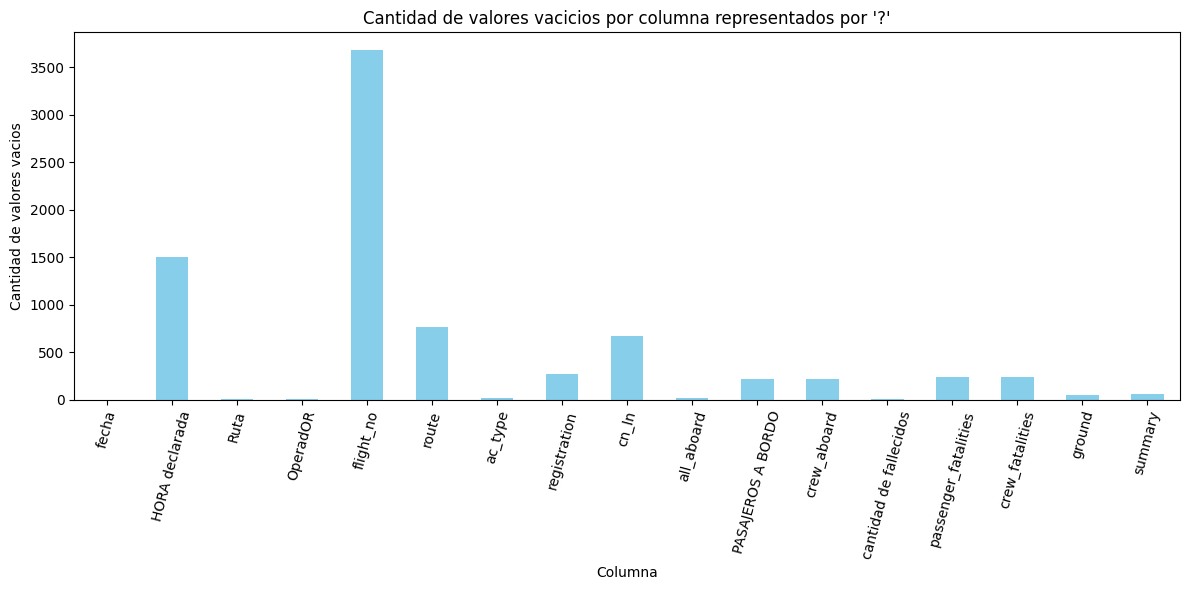

In [10]:
#hacemos un grafico viendo lo valores con vacios ('?')
plt.figure(figsize=(12,6))
contador_de_vacios.plot(kind='bar',color='skyblue')
plt.title("Cantidad de valores vacicios por columna representados por '?'")
plt.xlabel('Columna')
plt.ylabel('Cantidad de valores vacios')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [11]:
#contamos la cantidad de valores distintos de ´?´, para poder graficar en histogramas con columnas apiladas
valores_con_valores = df_accidentes_aviones.apply(lambda x: x[x != '?'].count())

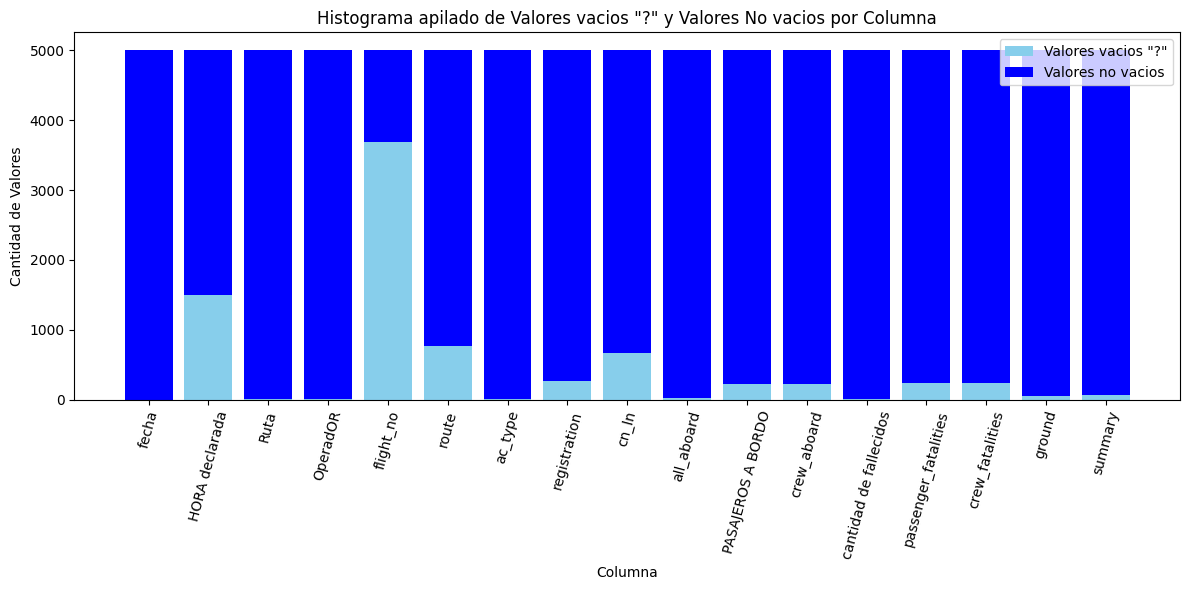

In [12]:
#Ahora hacemos un grafico de columnas apiladas
plt.figure(figsize=(12,6))
plt.bar(contador_de_vacios.index, contador_de_vacios, color='skyblue', label='Valores vacios "?"')
plt.bar(valores_con_valores.index, valores_con_valores, bottom=contador_de_vacios, color='blue', label='Valores no vacios')
plt.title('Histograma apilado de Valores vacios "?" y Valores No vacios por Columna')
plt.xlabel('Columna')
plt.ylabel('Cantidad de Valores')
plt.xticks(rotation=75)
plt.legend()
plt.tight_layout()
plt.show()

*Con este grafico podemos ver la cantidad de columnas que tienen estos campos vacios representados por ´?´. Deberiamos cambiar estos valores ´?´ por valores None, para que no afecten a la hora de hacer nuestro Dashboard.
Como podemos observar la columna 'flight_no', su porcentaje de valores vacios es de un 73,54%. Podriamos eliminar la columna, ya que no aporta mucho a nuestro analisis porque la mayoria de sus valores son nulos, pero vamos a dejar la columna y unicamnete cambiaremos estos valores por None.*

In [13]:
#hacemos un copia del df para empezar a hacerle modificaciones
df_accidentes_aviones_2 = df_accidentes_aviones.copy()

Primero voy a modificar los valores al tipo que le corresponden. Hay varias columnas que son *object* y tienen que ser *int*

In [14]:
df_accidentes_aviones_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha                   5008 non-null   object
 1   HORA declarada          5008 non-null   object
 2   Ruta                    5008 non-null   object
 3   OperadOR                5008 non-null   object
 4   flight_no               5008 non-null   object
 5   route                   5007 non-null   object
 6   ac_type                 5008 non-null   object
 7   registration            5008 non-null   object
 8   cn_ln                   5008 non-null   object
 9   all_aboard              5008 non-null   object
 10  PASAJEROS A BORDO       5008 non-null   object
 11  crew_aboard             5008 non-null   object
 12  cantidad de fallecidos  5008 non-null   object
 13  passenger_fatalities    5008 non-null   object
 14  crew_fatalities         5008 non-null   object
 15  ground   

In [15]:
#verificamos que la columna 'ground' tmabien sea numerico para incluirla en la lista de cambio
sin_duplicados = df_accidentes_aviones_2['ground'].drop_duplicates()
sin_duplicados

0          0
26        10
60         1
63         5
103        ?
308       11
361       15
372        2
527       53
559       22
671       20
687       63
701       37
727       19
735       58
796       36
858       16
922        3
1121      14
1122       4
1195       7
1343      29
1433       8
1442       6
1575      13
1775      17
1874      31
2021      87
2139      23
2238      33
2259     125
2395      71
2450      24
2605      25
2877     113
2984      12
3015      32
3144      40
3222       9
3296      49
3376      35
3445      44
3547      18
3580      45
3633      50
3794      39
4004     225
4051      30
4346    2750
4388      78
4402      85
4669      47
Name: ground, dtype: object

In [16]:
#Son 7 columnas que necesitan esta modificación
columnas_a_convertir = ['all_aboard', 'PASAJEROS A BORDO','crew_aboard','cantidad de fallecidos','passenger_fatalities','crew_fatalities','ground']

#hacemos un for paara poder cambiar de manera más limpia
for columna in columnas_a_convertir:
    df_accidentes_aviones_2[columna] = pd.to_numeric(df_accidentes_aviones_2[columna], errors='coerce', downcast='integer')

In [17]:
#verificamos que hizo
df_accidentes_aviones_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fecha                   5008 non-null   object 
 1   HORA declarada          5008 non-null   object 
 2   Ruta                    5008 non-null   object 
 3   OperadOR                5008 non-null   object 
 4   flight_no               5008 non-null   object 
 5   route                   5007 non-null   object 
 6   ac_type                 5008 non-null   object 
 7   registration            5008 non-null   object 
 8   cn_ln                   5008 non-null   object 
 9   all_aboard              4991 non-null   float64
 10  PASAJEROS A BORDO       4787 non-null   float64
 11  crew_aboard             4789 non-null   float64
 12  cantidad de fallecidos  5000 non-null   float64
 13  passenger_fatalities    4773 non-null   float64
 14  crew_fatalities         4773 non-null   float

Se supone que *downcast='integer'*, si se puede cambiar los numero te los cambia a integer, pero no esta sucediendo. Si queremos aplicar un *'.asytype(int)'* nos saltaria un error por los valores NaN, entonces tendriamos que aplicar un *fillna(0)*. Lo cual no es lo que buscamos ya que los valores NaN nos ayuda a representar la falta de valor y el 0 representa un un numero en sí, que es 0.

*Ahora voy a cambiar la fecha a un formato correcto*

In [18]:
df_accidentes_aviones_2['fecha']

0       September 17, 1908
1       September 07, 1909
2            July 12, 1912
3          August 06, 1913
4       September 09, 1913
               ...        
5003        March 28, 2021
5004          May 21, 2021
5005         June 10, 2021
5006         July 04, 2021
5007         July 06, 2021
Name: fecha, Length: 5008, dtype: object

In [19]:
df_accidentes_aviones_2['fecha'] = pd.to_datetime(df_accidentes_aviones_2['fecha'], format= '%B %d, %Y')

*verificamos que se haya cambiado correcetamente toda la columna a datatime*

In [20]:
df_accidentes_aviones_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   datetime64[ns]
 1   HORA declarada          5008 non-null   object        
 2   Ruta                    5008 non-null   object        
 3   OperadOR                5008 non-null   object        
 4   flight_no               5008 non-null   object        
 5   route                   5007 non-null   object        
 6   ac_type                 5008 non-null   object        
 7   registration            5008 non-null   object        
 8   cn_ln                   5008 non-null   object        
 9   all_aboard              4991 non-null   float64       
 10  PASAJEROS A BORDO       4787 non-null   float64       
 11  crew_aboard             4789 non-null   float64       
 12  cantidad de fallecidos  5000 non-null   float64      

In [21]:
df_accidentes_aviones_2.head()

fecha HORA declarada                                Ruta  \
0 1908-09-17           1718                 Fort Myer, Virginia   
1 1909-09-07              ?             Juvisy-sur-Orge, France   
2 1912-07-12           0630           Atlantic City, New Jersey   
3 1913-08-06              ?  Victoria, British Columbia, Canada   
4 1913-09-09           1830                  Over the North Sea   

                 OperadOR flight_no          route                 ac_type  \
0    Military - U.S. Army         ?  Demonstration        Wright Flyer III   
1                       ?         ?       Air show          Wright Byplane   
2    Military - U.S. Navy         ?    Test flight               Dirigible   
3                 Private         ?              ?        Curtiss seaplane   
4  Military - German Navy         ?              ?  Zeppelin L-1 (airship)   

  registration cn_ln  all_aboard  PASAJEROS A BORDO  crew_aboard  \
0            ?     1         2.0                1.0          1.0   
1          SC1     ?         1.0                0.0          1.0   
2            ?     ?         5.0                0.0          5.0   
3            ?     ?         1.0                0.0          1.0   
4            ?     ?        20.0                NaN          NaN   

   cantidad de fallecidos  passenger_fatalities  crew_fatalities  ground  \
0                     1.0                   1.0              0.0     0.0   
1                     1.0                   0.0              0.0     0.0   
2                     5.0                   0.0              5.0     0.0   
3                     1.0                   0.0              1.0     0.0   
4                    14.0                   NaN              NaN     0.0   

                                             summary  
0  During a demonstration flight, a U.S. Army fly...  
1  Eugene Lefebvre was the first pilot to ever be...  
2  First U.S. dirigible Akron exploded just offsh...  
3  The first fatal airplane accident in Canada oc...  
4  The airship flew into a thunderstorm and encou...

*Ahora reemplazamos los valores '?' por valores None*

In [22]:
#cambiamos todos los valores '?' por None en el df
df_accidentes_aviones_2.replace('?', None, inplace=True)

In [23]:
#verificamos
df_accidentes_aviones_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   datetime64[ns]
 1   HORA declarada          3504 non-null   object        
 2   Ruta                    5003 non-null   object        
 3   OperadOR                4998 non-null   object        
 4   flight_no               1326 non-null   object        
 5   route                   4245 non-null   object        
 6   ac_type                 4995 non-null   object        
 7   registration            4736 non-null   object        
 8   cn_ln                   4341 non-null   object        
 9   all_aboard              4991 non-null   float64       
 10  PASAJEROS A BORDO       4787 non-null   float64       
 11  crew_aboard             4789 non-null   float64       
 12  cantidad de fallecidos  5000 non-null   float64      

In [51]:
#cambiamos el nombre de las columnas
#primero definimos los cambios
cambio_de_nombres = {
    'fecha' : 'Fecha del siniestro',
    'HORA declarada' : 'Hora declarada',
    'Ruta': 'Lugar del accidente',
    'OperadOR' : 'Tipo de vuelo',
    'flight_no' : 'Identidicador del vuelo',
    'route' : 'Recorrido',
    'ac_type': 'Modelo del aeronave',
    'registration' : 'Matricula del aeronave',
    'cn_ln' : 'Numero de serie',
    'all_aboard' : 'Personas a bordo',
    'PASAJEROS A BORDO' : 'Pasajeros a bordo',
    'crew_aboard' : 'Tripulantes a bordo',
    'cantidada de fallecidos' : 'Fallecidos',
    'passenger_fatalities' : 'Pasajeros fallecidos',
    'crew_fatalities' : 'Tipulación fallecidos',
    'ground' : 'Personas afectadas (No abordo)',
    'summary' : 'Informe del siniestro'
}

#realizamos el cambio
df_accidentes_aviones_2.rename(columns=cambio_de_nombres, inplace=True)

In [91]:
df_accidentes_aviones_2.rename(columns={'Personas afectadas (No abordo)':'Personas afectadas (No a bordo)'}, inplace=True)

In [92]:
df_accidentes_aviones_2.head()

Fecha del accidente Hora declarada                 Lugar del accidente  \
0          1908-09-17           1718                 Fort Myer, Virginia   
1          1909-09-07           None             Juvisy-sur-Orge, France   
2          1912-07-12           0630           Atlantic City, New Jersey   
3          1913-08-06           None  Victoria, British Columbia, Canada   
4          1913-09-09           1830                  Over the North Sea   

            Tipo de vuelo Identidicador del vuelo      Recorrido  \
0    Military - U.S. Army                    None  Demonstration   
1                    None                    None       Air show   
2    Military - U.S. Navy                    None    Test flight   
3                 Private                    None           None   
4  Military - German Navy                    None           None   

      Modelo del aeronave Matricula del aeronave Numero de serie  \
0        Wright Flyer III                   None               1   
1          Wright Byplane                    SC1            None   
2               Dirigible                   None            None   
3        Curtiss seaplane                   None            None   
4  Zeppelin L-1 (airship)                   None            None   

   Personas a bordo  Pasajeros a bordo  Tripulantes a bordo  \
0               2.0                1.0                  1.0   
1               1.0                0.0                  1.0   
2               5.0                0.0                  5.0   
3               1.0                0.0                  1.0   
4              20.0                NaN                  NaN   

   Cantidad de fallecidos  Pasajeros fallecidos  Tipulación fallecidos  \
0                     1.0                   1.0                    0.0   
1                     1.0                   0.0                    0.0   
2                     5.0                   0.0                    5.0   
3                     1.0                   0.0                    1.0   
4                    14.0                   NaN                    NaN   

   Personas afectadas (No a bordo)  \
0                              0.0   
1                              0.0   
2                              0.0   
3                              0.0   
4                              0.0   

                               Informe del siniestro  
0  During a demonstration flight, a U.S. Army fly...  
1  Eugene Lefebvre was the first pilot to ever be...  
2  First U.S. dirigible Akron exploded just offsh...  
3  The first fatal airplane accident in Canada oc...  
4  The airship flew into a thunderstorm and encou...

**Ahora vamos a corregir las horas declaradas**

In [246]:
#vamos a corregir aquellos valores que tienen un error de tipeo para que la función filtre mejor
df_accidentes_aviones_2['Hora declarada'] = df_accidentes_aviones_2['Hora declarada'].str.replace('c:', '')
df_accidentes_aviones_2['Hora declarada'] = df_accidentes_aviones_2['Hora declarada'].str.replace('Z', '')
df_accidentes_aviones_2['Hora declarada'] = df_accidentes_aviones_2['Hora declarada'].str.replace('c ', '')
df_accidentes_aviones_2['Hora declarada'] = df_accidentes_aviones_2['Hora declarada'].replace('900', '0900')
df_accidentes_aviones_2['Hora declarada'] = df_accidentes_aviones_2['Hora declarada'].replace('245', '0245')
df_accidentes_aviones_2['Hora declarada'] = df_accidentes_aviones_2['Hora declarada'].replace('175', '1750')
df_accidentes_aviones_2['Hora declarada'] = df_accidentes_aviones_2['Hora declarada'].str.replace(';', ':')

In [247]:
#definimos la función
def cambio_hora(hora):
    if hora is None:
        return None
    patron_de_busqueda = r'^\d{4}$'#definimos el patron a buscar, esto me indica que va a buscar exactamente 4 digitos y que cada uno valla de 0 a 9
    if re.match(patron_de_busqueda, hora):
        hora_datetime = pd.to_datetime(hora, format='%H%M', errors='coerce')
        if not pd.isnull(hora_datetime):
            return hora_datetime.strftime('%H:%M')
    return hora

In [248]:
#Ahora aplicamos la función
df_accidentes_aviones_2['Hora declarada'] = df_accidentes_aviones_2['Hora declarada'].apply(cambio_hora)

In [249]:
#verificamos y vemos si se cambió el tipo de la columna hora declarada
df_accidentes_aviones_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Fecha del accidente              5008 non-null   datetime64[ns]
 1   Hora declarada                   3504 non-null   object        
 2   Lugar del accidente              5003 non-null   object        
 3   Tipo de vuelo                    4998 non-null   object        
 4   Identidicador del vuelo          1326 non-null   object        
 5   Recorrido                        4245 non-null   object        
 6   Modelo del aeronave              4995 non-null   object        
 7   Matricula del aeronave           4736 non-null   object        
 8   Numero de serie                  4341 non-null   object        
 9   Personas a bordo                 4991 non-null   float64       
 10  Pasajeros a bordo                4787 non-null   float64       
 

In [277]:
# Limpiamos los valores para eliminar espacios en blanco al principio
df_accidentes_aviones_2['Hora declarada'] = df_accidentes_aviones_2['Hora declarada'].str.strip()

In [278]:
#aplicamos el cambio de str a datatime pero solo con la hora y minutos
df_accidentes_aviones_2['Hora declarada'] = pd.to_datetime(df_accidentes_aviones_2['Hora declarada'], format='%H:%M').dt.time

In [279]:
#verificamos si se realizo el cambio correctamente
type(df_accidentes_aviones_2['Hora declarada'].iloc[0])

datetime.time

**Ahora podemos hacer más analisis**

In [25]:
import pandas_profiling
from pandas_profiling.utils.cache import cache_file

C:\Users\PC\AppData\Local\Temp\ipykernel_8392\1577145084.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [281]:
report = df_accidentes_aviones_2.profile_report(html={'style':{'full_width':True}})

In [282]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

*Hay columnas que tienen un alta correlación, estas columnas son: Personas a bordo,	Pasajeros a bordo,	Tripulantes a bodo,	cantidad de fallecidos, Pasajeros fallecidos y Tipulación fallecidos, con Personas afectadas (No abordo) su correlación es mucho más baja, veremos esto mucho mejor con un grafico que lo explique con números*

In [93]:
#filtramos por las columnas que si podemos hacer la correlación
df_corr = df_accidentes_aviones_2[['Personas a bordo','Pasajeros a bordo', 'Tripulantes a bordo','Cantidad de fallecidos','Pasajeros fallecidos','Tipulación fallecidos','Personas afectadas (No a bordo)']]

In [94]:
#calculamos la correlación de Pearson
matriz_correlacion = df_corr.corr()

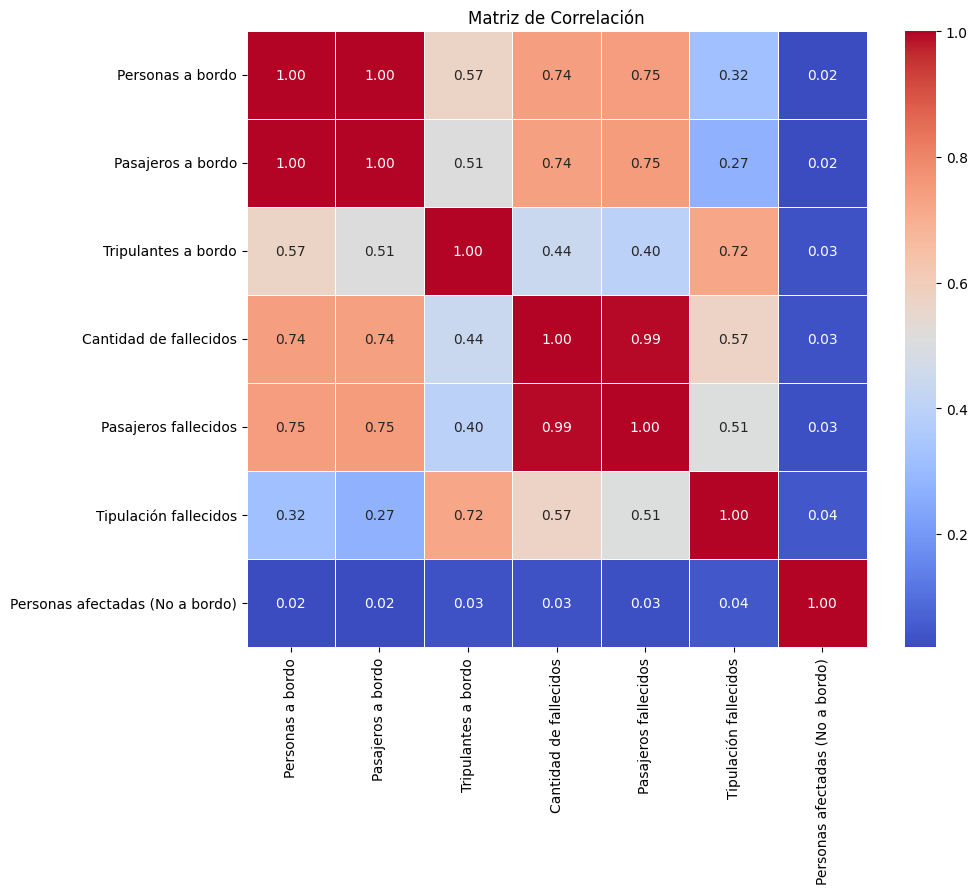

In [95]:
#graficamos
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [96]:
#ahora analizamos y vemos podemos encontrarnos en 'describe'
df_corr.describe()

Personas a bordo  Pasajeros a bordo  Tripulantes a bordo  \
count       4991.000000        4787.000000          4789.000000   
mean          31.121218          26.877376             4.519524   
std           45.479965          44.035342             3.758072   
min            0.000000           0.000000             0.000000   
25%            7.000000           3.000000             2.000000   
50%           16.000000          12.000000             4.000000   
75%           35.000000          30.000000             6.000000   
max          644.000000         614.000000            83.000000   

       Cantidad de fallecidos  Pasajeros fallecidos  Tipulación fallecidos  \
count             5000.000000           4773.000000            4773.000000   
mean                22.294000             18.940708               3.587262   
std                 35.000385             34.065190               3.177315   
min                  0.000000              0.000000               0.000000   
25%                  4.000000              1.000000               2.000000   
50%                 11.000000              7.000000               3.000000   
75%                 25.000000             21.000000               5.000000   
max                583.000000            560.000000              43.000000   

       Personas afectadas (No a bordo)  
count                      4964.000000  
mean                          1.718372  
std                          55.495544  
min                           0.000000  
25%                           0.000000  
50%                           0.000000  
75%                           0.000000  
max                        2750.000000

Según lo que se puede analizar en la tabla de correlación, puedo llegar a la conclusión que hay columnas que tienen mucha correlación. Tienen una relación lineal perfecta entre esas dos columnas, como por ejemplo, cantidad de pasajeros con pasajeros a bordo, también cantidad de fallecidos con pasajeros fallecidos.
Estos me indican una altisima relación porque su resultado es 1 y 0.99 respectivamente, pero esto tiene una explicación, ya que una es resultado de la suma de otras dos columnas, entonces una de esas columnas que es la que tiene más relevancia, por eso figura con mucha más correlación.
**Tener una correlación igual a 1 no significa necesariamente que los datos sean idénticos.**

*La columna Personas afectadas(No a bordo) tiene muy poca correlación con las demas columnas, recordemos que la correlación de Pearson se enfoca en la relación lineal entre las variable. Y si lo miramos fuera de los datos y lo trtamos de forma logica esto tiene mucho sentido, ya que esta columna me dice cuantas personas fueron afectadas que no son parte de la tripulacion o pasajeros, puden ser personas que vivian en la zona, personas que pasaban por ahi en el momento del siniestro, etc. Entonces a la columna de Personas afectadas (No a bordo) podemos analizarle el promedio de personas afectadas cada vez que ocurre un siniestro en un lugar rural y no rural, o temas que relacionen cosas muy especificas.*

**Vamos a agregar una columna con una localizacion más especifica como laltitud y longitud de donde ocurrio el accidente para poder tener más precisión**

In [98]:
df_accidentes_aviones_2['Lugar del accidente']

0                      Fort Myer, Virginia
1                  Juvisy-sur-Orge, France
2                Atlantic City, New Jersey
3       Victoria, British Columbia, Canada
4                       Over the North Sea
                       ...                
5003                    Near Butte, Alaska
5004                  Near Kaduna, Nigeria
5005            Near Pyin Oo Lwin, Myanmar
5006            Patikul, Sulu, Philippines
5007                        Palana, Russia
Name: Lugar del accidente, Length: 5008, dtype: object

* Utilizaromos la libreria *'geopy'*, esta nos proporciona herramientas de geocodificación y geolocalización. Para las coordenadas geograficas vamos a utilizar la biblioteca *'reverse_geopy'* *(Esta libreria esta incluida al principo donde se extraen todas las librerias que se utilizan)*

por ahora en espera

In [105]:
from geopy.geocoders import Nominatim
import time

In [124]:
#haremos una función
def obtener_latitud_longitud (ubicacion):
    try:
        geolocator = Nominatim(user_agent="cctmexico") #Definimos una instancia.El argumento user_agent se utiliza para identificar a mi aplicación o proyecto al hacer solicitudes al servicio de geocodificación. Debemos proporcionar un valor único y descriptivo como "geoapiExercises" para identificar el uso de la API. Esto es importante para cumplir con los términos de servicio de algunos servicios de geocodificación.
        time.sleep(2)  # Agrega un retraso de 1 segundo entre las solicitudes para reducir la velocidad    
        location = geolocator.geocode(ubicacion) #La función geocode toma como argumento la ubicación que deseamos buscar. Nos devolvera información acerca de la ubicación, tanto como país, ciudad, lalitud. longitud, etc.

        #ahora debemos definir que si encontro una ubicación me devuelva la laltitud y longuitud, de lo contrario None
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error: {e}")
        return None, None


In [125]:
df_accidentes_aviones_2[['Laltitud', 'Longitud']] = df_accidentes_aviones_2['Lugar del accidente'].apply(obtener_latitud_longitud).apply(pd.Series)
#.apply(pd.Series) para dividir las tuplas en dos columnas separadas, 'Latitud' y 'Longitud', y asignamos estos valores a nuevas columnas en el DataFrame.

KeyboardInterrupt: 

In [283]:
df_accidentes_aviones_2

Fecha del accidente Hora declarada                 Lugar del accidente  \
0             1908-09-17       17:18:00                 Fort Myer, Virginia   
1             1909-09-07            NaT             Juvisy-sur-Orge, France   
2             1912-07-12       06:30:00           Atlantic City, New Jersey   
3             1913-08-06            NaT  Victoria, British Columbia, Canada   
4             1913-09-09       18:30:00                  Over the North Sea   
...                  ...            ...                                 ...   
5003          2021-03-28       18:35:00                  Near Butte, Alaska   
5004          2021-05-21       18:00:00                Near Kaduna, Nigeria   
5005          2021-06-10       08:00:00          Near Pyin Oo Lwin, Myanmar   
5006          2021-07-04       11:30:00          Patikul, Sulu, Philippines   
5007          2021-07-06       15:00:00                      Palana, Russia   

                        Tipo de vuelo Identidicador del vuelo  \
0                Military - U.S. Army                    None   
1                                None                    None   
2                Military - U.S. Navy                    None   
3                             Private                    None   
4              Military - German Navy                    None   
...                               ...                     ...   
5003                Soloy Helicopters                    None   
5004    Military - Nigerian Air Force                    None   
5005     Military - Myanmar Air Force                    None   
5006  Military - Philippine Air Force                    None   
5007    Kamchatka Aviation Enterprise                     251   

                         Recorrido            Modelo del aeronave  \
0                    Demonstration               Wright Flyer III   
1                         Air show                 Wright Byplane   
2                      Test flight                      Dirigible   
3                             None               Curtiss seaplane   
4                             None         Zeppelin L-1 (airship)   
...                            ...                            ...   
5003           Sightseeing Charter    Eurocopter AS350B3 Ecureuil   
5004                          None  Beechcraft B300 King Air 350i   
5005          Naypyidaw - Anisakan               Beechcraft 1900D   
5006  Cagayan de Oro-Lumbia - Jolo       Lockheed C-130H Hercules   
5007        Petropavlovsk - Palana             Antonov An 26B-100   

     Matricula del aeronave Numero de serie  Personas a bordo  \
0                      None               1               2.0   
1                       SC1            None               1.0   
2                      None            None               5.0   
3                      None            None               1.0   
4                      None            None              20.0   
...                     ...             ...               ...   
5003                 N351SH            4598               6.0   
5004                 NAF203          FL-891              11.0   
5005                   4610           E-325              14.0   
5006                   5125            5125              96.0   
5007               RA-26085           12310              28.0   

      Pasajeros a bordo  Tripulantes a bordo  Cantidad de fallecidos  \
0                   1.0                  1.0                     1.0   
1                   0.0                  1.0                     1.0   
2                   0.0                  5.0                     5.0   
3                   0.0                  1.0                     1.0   
4                   NaN                  NaN                    14.0   
...                 ...                  ...                     ...   
5003                5.0                  1.0                     5.0   
5004                7.0                  4.0                    11.0   
5005             

In [318]:
df_accidentes_aviones_2

Fecha del accidente Hora declarada                 Lugar del accidente  \
0             1908-09-17       17:18:00                 Fort Myer, Virginia   
1             1909-09-07            NaT             Juvisy-sur-Orge, France   
2             1912-07-12       06:30:00           Atlantic City, New Jersey   
3             1913-08-06            NaT  Victoria, British Columbia, Canada   
4             1913-09-09       18:30:00                  Over the North Sea   
...                  ...            ...                                 ...   
5003          2021-03-28       18:35:00                  Near Butte, Alaska   
5004          2021-05-21       18:00:00                Near Kaduna, Nigeria   
5005          2021-06-10       08:00:00          Near Pyin Oo Lwin, Myanmar   
5006          2021-07-04       11:30:00          Patikul, Sulu, Philippines   
5007          2021-07-06       15:00:00                      Palana, Russia   

                        Tipo de vuelo Identidicador del vuelo  \
0                Military - U.S. Army                    None   
1                                None                    None   
2                Military - U.S. Navy                    None   
3                             Private                    None   
4              Military - German Navy                    None   
...                               ...                     ...   
5003                Soloy Helicopters                    None   
5004    Military - Nigerian Air Force                    None   
5005     Military - Myanmar Air Force                    None   
5006  Military - Philippine Air Force                    None   
5007    Kamchatka Aviation Enterprise                     251   

                         Recorrido            Modelo del aeronave  \
0                    Demonstration               Wright Flyer III   
1                         Air show                 Wright Byplane   
2                      Test flight                      Dirigible   
3                             None               Curtiss seaplane   
4                             None         Zeppelin L-1 (airship)   
...                            ...                            ...   
5003           Sightseeing Charter    Eurocopter AS350B3 Ecureuil   
5004                          None  Beechcraft B300 King Air 350i   
5005          Naypyidaw - Anisakan               Beechcraft 1900D   
5006  Cagayan de Oro-Lumbia - Jolo       Lockheed C-130H Hercules   
5007        Petropavlovsk - Palana             Antonov An 26B-100   

     Matricula del aeronave Numero de serie  Personas a bordo  \
0                      None               1               2.0   
1                       SC1            None               1.0   
2                      None            None               5.0   
3                      None            None               1.0   
4                      None            None              20.0   
...                     ...             ...               ...   
5003                 N351SH            4598               6.0   
5004                 NAF203          FL-891              11.0   
5005                   4610           E-325              14.0   
5006                   5125            5125              96.0   
5007               RA-26085           12310              28.0   

      Pasajeros a bordo  Tripulantes a bordo  Cantidad de fallecidos  \
0                   1.0                  1.0                     1.0   
1                   0.0                  1.0                     1.0   
2                   0.0                  5.0                     5.0   
3                   0.0                  1.0                     1.0   
4                   NaN                  NaN                    14.0   
...                 ...                  ...                     ...   
5003                5.0                  1.0                     5.0   
5004                7.0                  4.0                    11.0   
5005             

*Vamos a agregar el país de Estados Unidos*

*Aqui verificamos que en las localizaciones de USA solamente aparece el estado y no aparece el país, vamos a agregarlo*

In [447]:
#primero creamos la lista de los Estados de Usa
estados_usa = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
    "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky",
    "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri",
    "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York",
    "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island",
    "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia",
    "Washington", "West Virginia", "Wisconsin", "Wyoming"
]



In [448]:
#Ahora hacemos lo mismo pero con Canada
divisiones_de_canada = [
    "Alberta",
    "Columbia Británica",
    "Isla del Príncipe Eduardo",
    "Manitoba",
    "Nuevo Brunswick",
    "Nueva Escocia",
    "Ontario",
    "Quebec",
    "Saskatchewan",
    "Territorios del Noroeste",
    "Nunavut",
    "Yukón"
]

In [449]:
#Ahora hacemos lo mismo pero con Japon
prefecturas_de_japon = ["Aichi", "Akita", "Aomori", "Chiba", "Ehime", "Fukui", "Fukuoka", "Fukushima", "Gifu", "Gunma", "Hiroshima", "Hokkaido", "Hyogo", "Ibaraki", "Ishikawa", "Iwate", "Kagawa", "Kagoshima", "Kanagawa", "Kochi", "Kumamoto", "Kyoto", "Mie", "Miyagi", "Miyazaki", "Nagano", "Nagasaki", "Nara", "Niigata", "Oita", "Okayama", "Okinawa", "Osaka", "Saga", "Saitama", "Shiga", "Shimane", "Shizuoka", "Tochigi", "Tokushima", "Tokyo", "Tottori", "Toyama", "Wakayama", "Yamagata", "Yamaguchi", "Yamanashi"]

In [450]:
#definimos la funcion de USA
def agregar_usa(localización):
    try:
        if isinstance(localización, str):
            for estado in estados_usa:
                if estado in localización:
                    return f'{localización}, United States of America'
            return localización
        else:
            return localización
    except Exception as e:
        print(f"Error: {e}")
        return localización


In [451]:
#definimos la funcion de canada
def agregar_canada(localización):
    try:
        if isinstance(localización, str):
            for estado in divisiones_de_canada:
                if estado in localización:
                    return f'{localización}, Canada'
            return localización
        else:
            return localización
    except Exception as e:
        print(f"Error: {e}")
        return localización

In [452]:
#definimos la funcion de Japon
def agregar_japon(localización):
    try:
        if isinstance(localización, str):
            for estado in prefecturas_de_japon:
                if estado in localización:
                    return f'{localización}, Japan'
            return localización
        else:
            return localización
    except Exception as e:
        print(f"Error: {e}")
        return localización

In [454]:
#aplicamos la funcion de USA
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].apply(agregar_usa)

In [455]:
#aplicamos la funcion de Canada
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].apply(agregar_canada)

In [456]:
#aplicamos la funcion de Japon
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].apply(agregar_japon)

In [457]:
df_accidentes_aviones_2

Fecha del accidente Hora declarada  \
0             1908-09-17       17:18:00   
1             1909-09-07            NaN   
2             1912-07-12       06:30:00   
3             1913-08-06            NaN   
4             1913-09-09       18:30:00   
...                  ...            ...   
5003          2021-03-28       18:35:00   
5004          2021-05-21       18:00:00   
5005          2021-06-10       08:00:00   
5006          2021-07-04       11:30:00   
5007          2021-07-06       15:00:00   

                                    Lugar del accidente  \
0         Fort Myer, Virginia, United States of America   
1                               Juvisy-sur-Orge, France   
2     Atlantic City, New Jersey, United States of Am...   
3                    Victoria, British Colombia, Canada   
4                                    Over the North Sea   
...                                                 ...   
5003       Near Butte, Alaska, United States of America   
5004                               Near Kaduna, Nigeria   
5005                 Near Pyin Oo Lwin, Myanmar (Burma)   
5006                         Patikul, Sulu, Philippines   
5007                                     Palana, Russia   

                        Tipo de vuelo Identidicador del vuelo  \
0                Military - U.S. Army                     NaN   
1                                 NaN                     NaN   
2                Military - U.S. Navy                     NaN   
3                             Private                     NaN   
4              Military - German Navy                     NaN   
...                               ...                     ...   
5003                Soloy Helicopters                     NaN   
5004    Military - Nigerian Air Force                     NaN   
5005     Military - Myanmar Air Force                     NaN   
5006  Military - Philippine Air Force                     NaN   
5007    Kamchatka Aviation Enterprise                     251   

                         Recorrido            Modelo del aeronave  \
0                    Demonstration               Wright Flyer III   
1                         Air show                 Wright Byplane   
2                      Test flight                      Dirigible   
3                              NaN               Curtiss seaplane   
4                              NaN         Zeppelin L-1 (airship)   
...                            ...                            ...   
5003           Sightseeing Charter    Eurocopter AS350B3 Ecureuil   
5004                           NaN  Beechcraft B300 King Air 350i   
5005          Naypyidaw - Anisakan               Beechcraft 1900D   
5006  Cagayan de Oro-Lumbia - Jolo       Lockheed C-130H Hercules   
5007        Petropavlovsk - Palana             Antonov An 26B-100   

     Matricula del aeronave Numero de serie  Personas a bordo  \
0                       NaN               1               2.0   
1                       SC1             NaN               1.0   
2                       NaN             NaN               5.0   
3                       NaN             NaN               1.0   
4                       NaN             NaN              20.0   
...                     ...             ...               ...   
5003                 N351SH            4598               6.0   
5004                 NAF203          FL-891              11.0   
5005                   4610           E-325              14.0   
5006                   5125            5125              96.0   
5007               RA-26085           12310              28.0   

      Pasajeros a bordo  Tripulantes a bordo  Cantidad de fallecidos  \
0                   1.0                  1.0                     1.0   
1                   0.0                  1.0                     1.0   
2                   0.0                  5.0                     5.0   
3                   0.0                  1.0                     1.0   
4                   NaN     

*Ahora crearemos un df con los paises que aparecen*

In [458]:
paises_ingles = [ 
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad",
    "Chile", "China", "Colombia", "Comoros", "Congo (Brazzaville)", "Congo (Kinshasa)", "Costa Rica", "Croatia",
    "Cuba", "Cyprus", "Czech Republic","Czechoslovakia", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "East Timor (Timor-Leste)",
    "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Ethiopia", "Fiji", "Finland",
    "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea",
    "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq",
    "Ireland", "Israel", "Italy", "Ivory Coast", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati",
    "Korea, North", "Korea, South", "Kosovo", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho",
    "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Macedonia", "Madagascar", "Malawi", "Malaysia",
    "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova",
    "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar (Burma)", "Namibia", "Nauru", "Nepal",
    "Netherlands", "New Zealand","New Caledonia", "Nicaragua", "Niger", "Nigeria", "Norway", "Oman", "Pakistan", "Palau", "Palestine",
    "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Qatar", "Romania",
    "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "San Marino",
    "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia",
    "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname",
    "Swaziland", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania", "Thailand", "Togo", "Tonga",
    "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates",
    "United Kingdom", "United States of America", "Uruguay", "Uzbekistan", "Vanuatu", "Vatican City", "Venezuela",
    "Vietnam", "Yemen", "Zambia", "Zimbabwe", "England", "Scotland", "Wales", "Northern Ireland","Puerto Rico"
]


In [459]:
def identificador_paises(localización):
    if localización is not None:
        if isinstance(localización, str):
            for pais in paises_ingles:
                if pais in localización:
                    return pais
        # Agrega un manejo para valores de tipo float
        elif isinstance(localización, float):
            return localización
    return None


In [463]:
df_accidentes_aviones_2['País'] = df_accidentes_aviones_2['Lugar del accidente'].apply(identificador_paises)

In [464]:
df_accidentes_aviones_2.head()

Fecha del accidente Hora declarada  \
0          1908-09-17       17:18:00   
1          1909-09-07            NaN   
2          1912-07-12       06:30:00   
3          1913-08-06            NaN   
4          1913-09-09       18:30:00   

                                 Lugar del accidente           Tipo de vuelo  \
0      Fort Myer, Virginia, United States of America    Military - U.S. Army   
1                            Juvisy-sur-Orge, France                     NaN   
2  Atlantic City, New Jersey, United States of Am...    Military - U.S. Navy   
3                 Victoria, British Colombia, Canada                 Private   
4                                 Over the North Sea  Military - German Navy   

  Identidicador del vuelo      Recorrido     Modelo del aeronave  \
0                     NaN  Demonstration        Wright Flyer III   
1                     NaN       Air show          Wright Byplane   
2                     NaN    Test flight               Dirigible   
3                     NaN            NaN        Curtiss seaplane   
4                     NaN            NaN  Zeppelin L-1 (airship)   

  Matricula del aeronave Numero de serie  Personas a bordo  Pasajeros a bordo  \
0                    NaN               1               2.0                1.0   
1                    SC1             NaN               1.0                0.0   
2                    NaN             NaN               5.0                0.0   
3                    NaN             NaN               1.0                0.0   
4                    NaN             NaN              20.0                NaN   

   Tripulantes a bordo  Cantidad de fallecidos  Pasajeros fallecidos  \
0                  1.0                     1.0                   1.0   
1                  1.0                     1.0                   0.0   
2                  5.0                     5.0                   0.0   
3                  1.0                     1.0                   0.0   
4                  NaN                    14.0                   NaN   

   Tipulación fallecidos  Personas afectadas (No a bordo)  \
0                    0.0                              0.0   
1                    0.0                              0.0   
2                    5.0                              0.0   
3                    1.0                              0.0   
4                    NaN                              0.0   

                               Informe del siniestro  \
0  During a demonstration flight, a U.S. Army fly...   
1  Eugene Lefebvre was the first pilot to ever be...   
2  First U.S. dirigible Akron exploded just offsh...   
3  The first fatal airplane accident in Canada oc...   
4  The airship flew into a thunderstorm and encou...   

                       pais                      País  
0  United States of America  United States of America  
1                    France                    France  
2  United States of America  United States of America  
3                    Canada                    Canada  
4                      None                      None

*Solucionamos los errores de tipeo*

In [453]:
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Bulgeria', 'Bulgaria')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('UK', 'United Kingdom')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Columbia', 'Colombia')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Minnisota', 'Minnesota')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('NY', 'New York')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('WY', 'Wyoming')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('United States', 'United States of America')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Unied Kingdom', 'United Kingdom') 
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace("L'Hospitalet, Ariège", "L'Hospitalet, Ariège, France")
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Algiers', 'Algeria')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Saint Catharines, Ontario', 'Saint Catharines, Ontario, Canada')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Ilinois', 'Illinois')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Near Ljubljana, Yugoslavia', 'Near Ljubljana, Yugoslavia, Slovenia')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Californiia', 'California')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Boliva', 'Bolivia')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Cailifornia', 'California')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Amsterdam', 'Amsterdam, Netherlands')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Gospic,,Coatia', 'Gospic, Croatia')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Coatia', 'Croatia')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Australila', 'Australia')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('bulgaria', 'Bulgaria')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Timor', 'Timor, Indonesia')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Newfoundland', 'Newfoundland, Canada')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Swden', 'Sweden')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Bosnia', 'Bosnia and Herzegovina')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Tasmania', 'Tasmania, Australia')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Malaya', 'Malaysia')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('South Korea', 'Korea, South')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Bugaria', 'Bulgaria')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('North Korea', 'Korea, North')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Dekota', 'Dakota')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Mexic', 'Mexico')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Burma (Myanmar)', 'Myanmar (Burma)')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Washingon', 'Washington')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Burma', 'Myanmar (Burma)')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Baangladesh', 'Bangladesh')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Uzbekstan', 'Uzbekistan')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Aregntina', 'Argentina')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Jamacia', 'Jamaica')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Phillipines', 'Philippines')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Philipines', 'Philippines')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Myanmar', 'Myanmar (Burma)')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Airzona', 'Arizona')
df_accidentes_aviones_2['Lugar del accidente'] = df_accidentes_aviones_2['Lugar del accidente'].str.replace('Mississipi', 'Mississippi')

*Exportamos*

In [469]:
df_accidentes_aviones_2.to_csv('AccidentesAviones.csv', index=False)

**HAREMOS GRAFICOS Y ANALISIS**

In [470]:
df_accidentes_aviones_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Fecha del accidente              5008 non-null   object 
 1   Hora declarada                   3504 non-null   object 
 2   Lugar del accidente              5003 non-null   object 
 3   Tipo de vuelo                    4998 non-null   object 
 4   Identidicador del vuelo          1326 non-null   object 
 5   Recorrido                        4245 non-null   object 
 6   Modelo del aeronave              4995 non-null   object 
 7   Matricula del aeronave           4736 non-null   object 
 8   Numero de serie                  4341 non-null   object 
 9   Personas a bordo                 4991 non-null   float64
 10  Pasajeros a bordo                4787 non-null   float64
 11  Tripulantes a bordo              4789 non-null   float64
 12  Cantidad de fallecid

**VAMOS A GRAFICAR LA CANTIDAD DE MUERTES POR AÑO**

In [471]:
df_accidentes = df_accidentes_aviones_2.copy()

In [472]:
#la fecha la ponemos en formato datatime
df_accidentes['Fecha del accidente'] = pd.to_datetime(df_accidentes['Fecha del accidente'])

In [476]:
# Extraemos el año de la columna 'Fecha del accidente' y creamos una nueva columna con esta
df_accidentes['Año'] = df_accidentes['Fecha del accidente'].dt.year

In [477]:
df_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Fecha del accidente              5008 non-null   datetime64[ns]
 1   Hora declarada                   3504 non-null   object        
 2   Lugar del accidente              5003 non-null   object        
 3   Tipo de vuelo                    4998 non-null   object        
 4   Identidicador del vuelo          1326 non-null   object        
 5   Recorrido                        4245 non-null   object        
 6   Modelo del aeronave              4995 non-null   object        
 7   Matricula del aeronave           4736 non-null   object        
 8   Numero de serie                  4341 non-null   object        
 9   Personas a bordo                 4991 non-null   float64       
 10  Pasajeros a bordo                4787 non-null   float64    

*Extraemos para poder graficar la cantidad de fallecidos por año*

In [480]:
fallecidos_por_año = df_accidentes.groupby('Año')['Cantidad de fallecidos'].sum()

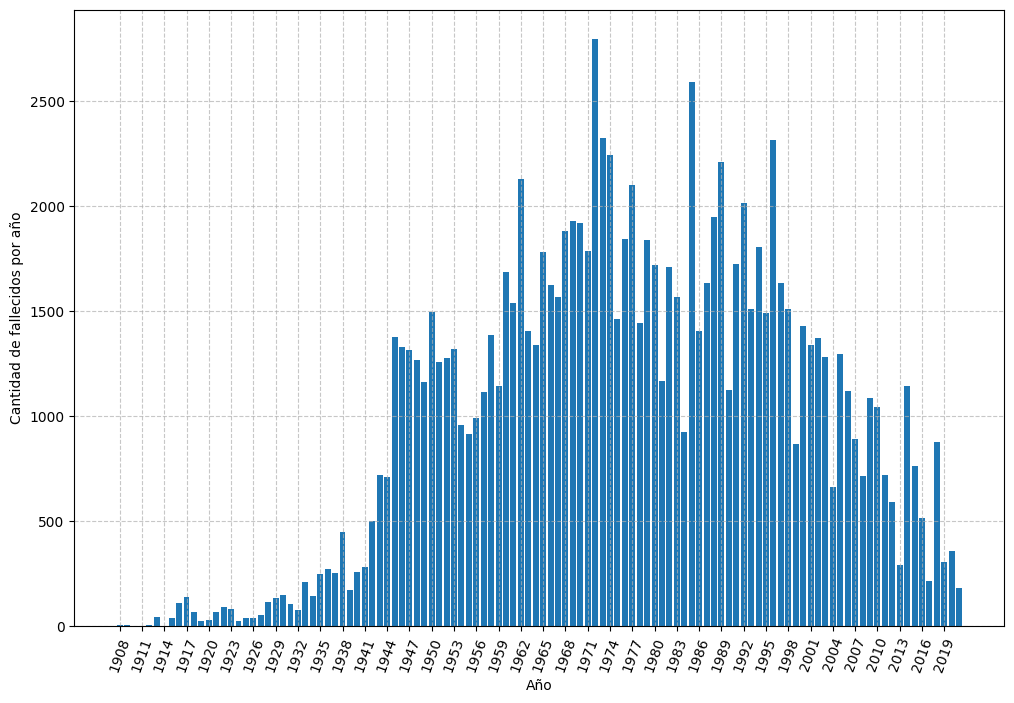

In [513]:
plt.figure(figsize=(12,8))
plt.bar(fallecidos_por_año.index, fallecidos_por_año.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de fallecidos por año')
plt.xticks(range(min(fallecidos_por_año.index), max(fallecidos_por_año.index)+1, 3), rotation=70)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

El año con más cantidad de muertes es 1972, seguido por 1985 y 1996

Desde el año con más cantidad de muertes que es 1972 podemos observar que las muertes causadas por accidentes aereos esta en una tendencia bajista, esto se debe a la disminución de accidentes aereos y es gracias a muchos factores de evolución en cuanto a la industria aeronáutica. Solamente analizando este grafico podemos decir que para el futuro se espera que esta tendencia continue de la misma manera.

Algunos de los facores responsables de esta tendencia se debe a muchas mejoras en la industria de la aviación, ya que la tecnologia avanza a pasos agigantados y la industria de la aeronáutica va de la mano con todas las mejoras y avances tecnologicos, también debemos destacar que hoy en día existen muchas regulaciones de seguridad y mejor gestion del trafico aereo, esto a ido evolucionando y avanzando a lo largo de los años. También debemos destacar que existe una mejora en el entrenamiento y en la formación de tripulación, ya que a lo largo de los años se fue adquiriendo una experiencia es una parte fundamental para el desarrolo y crecimiento en mundo de la aviación. Todo esto va de la mano con un mejor mantenimiento de las aeronaves, ya que tenemos mayores conocimiento respecto al tema, mayores herramientas para la investigación y contamos con la experiencia para poder desarrollar de manera más efectiva todos los campos necesarios de la industria.

*Seamos más especificos*

Vamos a ver la cantidad de fallecidos por tipo de victima a bordo

In [530]:
df_filtrado = df_accidentes[['Año', 'Tripulantes a bordo', 'Pasajeros fallecidos', 'Tipulación fallecidos']]

In [531]:
df_agrupado = df_filtrado.groupby('Año').sum()

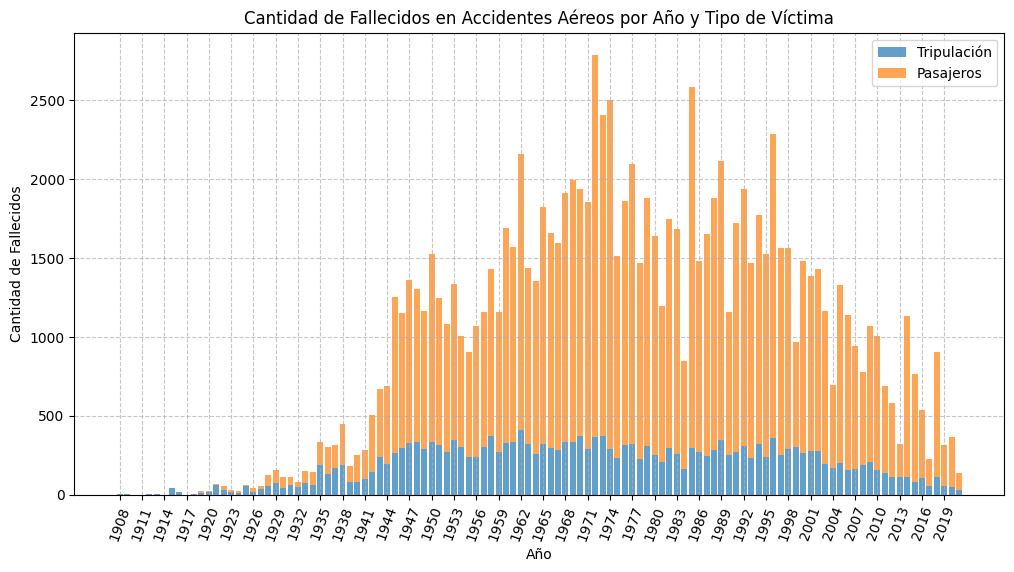

In [532]:
# Crea un gráfico de columnas apiladas
plt.figure(figsize=(12, 6))
plt.bar(df_agrupado.index, df_agrupado['Tripulantes a bordo'], label='Tripulación', alpha=0.7)
plt.bar(df_agrupado.index, df_agrupado['Pasajeros fallecidos'], bottom=df_agrupado['Tripulantes a bordo'], label='Pasajeros', alpha=0.7)
plt.xlabel('Año')
plt.ylabel('Cantidad de Fallecidos')
plt.xticks(range(min(fallecidos_por_año.index), max(fallecidos_por_año.index)+1, 3), rotation=70)
plt.title('Cantidad de Fallecidos en Accidentes Aéreos por Año y Tipo de Víctima')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Podemos ver la cantidad de fallecidos en total(como el grafico anterior), pero con la especificación de si la persona fallecida es tripulante o pasajero. 

1972 es el año que en el que lamentamblemente tenemos más victimas, pero no es el año en donde fallecieron más tripulantes. Para ser más especifico en 1962 (10 años antes) es el año con la cantidad más alta de tripulantes fallecidos.

En el grafico se puede apreciar que la cantidad de tripulantes fallecidos por año es mas o menos constante, es decir, no tiene mucha variación. Vamos a ver si esta relacionada a la cantidad de vuelos. También vamos a calcular cual es el promedio de tripulantes por vuelos.

In [593]:
# ponemos las columnas en un df
df_filtrado_tripulantes = df_accidentes[['Año', 'Tripulantes a bordo', 'Tipulación fallecidos', 'Identidicador del vuelo']]

# ahora agrupamos los datos por año y suma las cantidades de vuelos, tripulantes a bordo y tripulantes fallecidos
df_agrupado_tripulantes = df_filtrado_tripulantes.groupby('Año').agg({'Identidicador del vuelo': 'count', 'Tripulantes a bordo': 'sum', 'Tipulación fallecidos': 'sum'})


In [594]:
#vamos a reemplazar cantidad de vuelos por identificador de vuelo, ya que no esta haciendo lo esperado
cantidad_de_vuelos = df_accidentes.groupby('Año')['Año'].count()

In [595]:
#reemplazamos
df_agrupado_tripulantes['Identidicador del vuelo'] = cantidad_de_vuelos

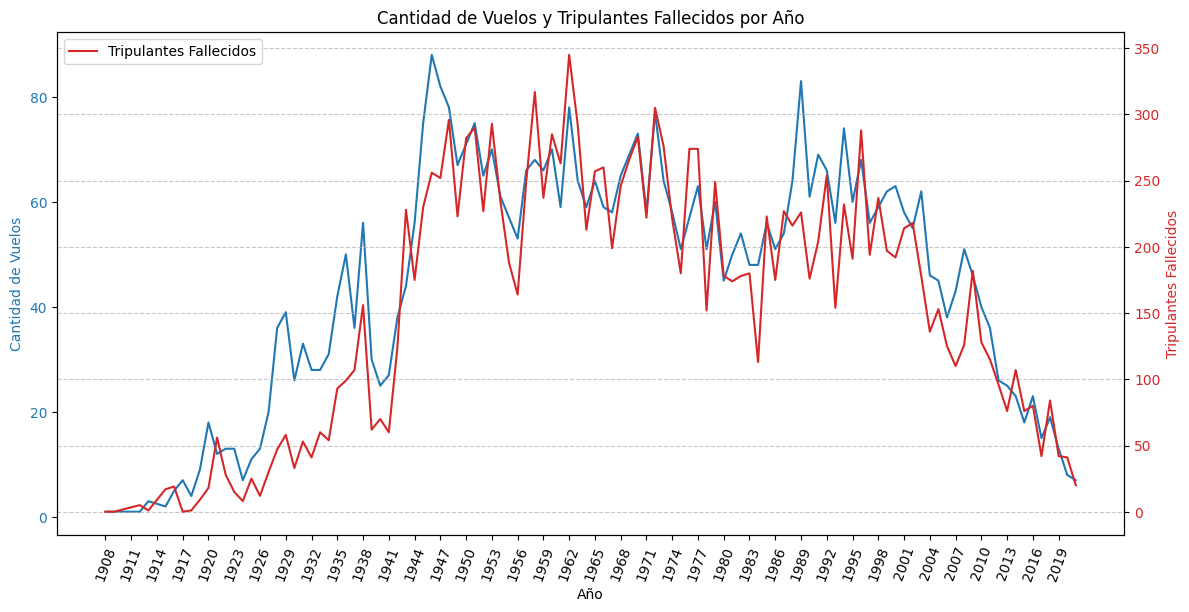

In [597]:
# Crear un gráfico de línea con dos ejes y dos series de datos
fig, x1 = plt.subplots(figsize=(12, 6)) #esto crea una figura de Matplotlib con dos ejes (x1 y x2) en una disposición vertical

# Configuración para la serie 'Cantidad de Vuelos', es el primero eje y
color = 'tab:blue' #definimos el color que utilizaremos en esta serie de datos(es para identificar)
x1.set_xlabel('Año') #establecemos la etiqueta de la variable independiente en este caso x1
plt.xticks(range(min(df_agrupado_tripulantes.index), max(df_agrupado_tripulantes.index)+1, 3), rotation = 70)#ponemos la lista de los años con un intervalo de 3 años
x1.set_ylabel('Cantidad de Vuelos', color=color) #establecemos la etiqueta para la variable independiente y1 y su color
x1.plot(df_agrupado_tripulantes.index, df_agrupado_tripulantes['Identidicador del vuelo'], color=color, label='Cantidad de Vuelos') #esto dibuja la serie de datos "Cantidad de Vuelos" en el primer eje (x1) utilizando los valores del índice de df_agrupado_tripulantes en el eje 'x' y los valores de "Identidicador del vuelo" en el eje 'y'. Se establece el color y se agrega una etiqueta.
x1.tick_params(axis='y', labelcolor=color) # establecemos los parámetros de las marcas en el eje 'y' del primer eje (x1) y configura el color de las etiquetas en azul.

# Configuración para la serie 'Tripulantes Fallecidos', es el segundo eje y
x2 = x1.twinx() #creamos un segundo eje 'y' (x2) que comparte el mismo eje 'x' (x1). Esto permite superponer dos gráficos verticalmente, uno encima del otro.
color = 'tab:red' #definimos color
x2.set_ylabel('Tripulantes Fallecidos', color=color) #etiquetamos y damos color a la variable 'y2'
x2.plot(df_agrupado_tripulantes.index, df_agrupado_tripulantes['Tipulación fallecidos'], color=color, label='Tripulantes Fallecidos')#dibuja
x2.tick_params(axis='y', labelcolor=color) #establecemos los parametros

# Configurar leyendas y etiquetas del gráfico
fig.tight_layout() #Ajusta automáticamente el espaciado entre los dos gráficos para que se vean bien sin superposiciones.
plt.title('Cantidad de Vuelos y Tripulantes Fallecidos por Año')#titulo del grafico
plt.grid(True, linestyle='--', alpha=0.7 )#agrego lineas, se supone que con el 'which='both'' le pone tanto horizontales como verticales pero, no me funciona
plt.legend(loc='upper left')#agrega una leyenda al gráfico en la esquina superior izquierda.
plt.show()

In [607]:
# Vamos a graficar la correlacion entre dos variables
df_provisional = df_agrupado_tripulantes[['Identidicador del vuelo', 'Tipulación fallecidos']]
df_agrupado_tripulantes_corr = df_provisional.corr()

In [608]:
df_agrupado_tripulantes_corr

Identidicador del vuelo  Tipulación fallecidos
Identidicador del vuelo                 1.000000               0.934986
Tipulación fallecidos                   0.934986               1.000000

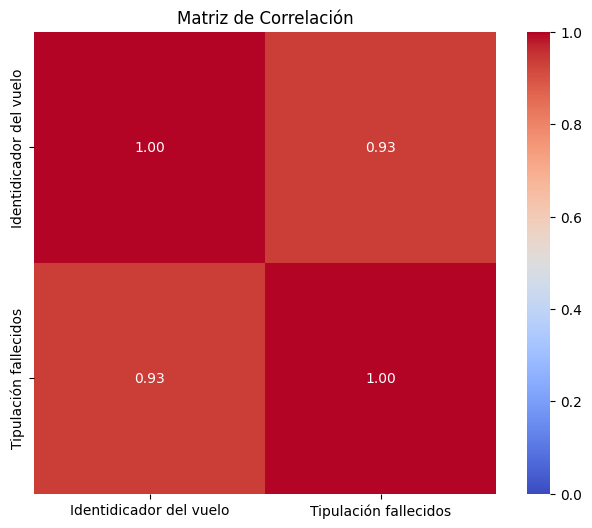

In [609]:
plt.figure(figsize=(8, 6))

# Genera un mapa de calor de la matriz de correlación
sns.heatmap(df_agrupado_tripulantes_corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=0, vmax=1, square=True)

# Añade etiquetas de los ejes y un título
plt.title('Matriz de Correlación')

# Muestra el gráfico
plt.show()

De acuerdo al grafico anterior que se pudo apreciar y a la confirmacion de esta tabla de correlación, podemos decir que la correlacion que existe entre los tripulantes a bordo y la cantidad de vuelos por año es muy alta, esto implica que es una correlación positiva fuerte. En otras palabras, a medida que aumenta la cantidad de vuelos accidentados por año, aumenta la cantidad de tripulantes fallecidos.

Y tal vez parezca algo muy logico, pero llevandolo a otras palabras me dice que cuando un avión sufre un accidente, las probabilidades de sobrevivir son muy bajas. Lo que enfatiza en la importancia de la seguridad.

Pero hay algo que tenemos que tener en cuenta, a lo largo de los años cada vez ocurren menos accidentes aereos *-esto lo podemos apreciar en el grafico de lineas sobrepuestas, ya que a medida que avanzamos en el tiempo la cantidad de vuelos disminuyen porque estamos extrayendo información de un data frame de accidentes aereos-*, por ende, la tasa de mortalidad para los tripulantes baja casi en paralelo a la cantidad de vuelos accidentados por año. Aquí se pone en evidencia la importancia del avance tecnologico, y como beneficia en muchos aspectos a nuestra vida.

In [620]:
df_agrupado_tripulantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 1908 to 2021
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Identidicador del vuelo  111 non-null    int64  
 1   Tripulantes a bordo      111 non-null    float64
 2   Tipulación fallecidos    111 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB


calculamos el promedio de la tripulacion por año por cada vuelo

In [621]:
#agregamos una columna con el Promedio de Tripulantes por Vuelo
df_agrupado_tripulantes['Promedio de Tripulantes por Vuelo'] = df_agrupado_tripulantes['Tripulantes a bordo'] / df_agrupado_tripulantes['Identidicador del vuelo']

In [625]:
#agregamos una columna con el Promedio de Tripulantes fallecidos por Vuelo
df_agrupado_tripulantes['Promedio de Tripulantes fallecidos por Vuelo'] = df_agrupado_tripulantes['Tipulación fallecidos'] / df_agrupado_tripulantes['Identidicador del vuelo']

In [632]:
#Calculamos el Promedio de Tripulantes por Vuelo
Promedio_Tripulantes_por_Vuelo = df_agrupado_tripulantes['Promedio de Tripulantes por Vuelo'].mean()
Promedio_Tripulantes_por_Vuelo

4.097221130915024

In [631]:
#Calculamos el Promedio de Tripulantes fallecidos por Vuelo
Promedio_Tripulantes_fallecidos_por_Vuelo = df_agrupado_tripulantes['Promedio de Tripulantes fallecidos por Vuelo'].mean()
Promedio_Tripulantes_fallecidos_por_Vuelo

3.169456849204451

In [633]:
#Calculamos cual es la probabilidad de que un tripulante sobreviva a un accidente aereo
probabilidad = 1-(Promedio_Tripulantes_fallecidos_por_Vuelo/Promedio_Tripulantes_por_Vuelo)
probabilidad

0.22643744432299584

En la matricas que vimos tenemos cual es el promedio de tripulantes por vuelos y tambien el promedio de tripulantes fallecidos por vuelos. Aqui podemos empezar a sacar conclusiones, como la de que ambos promedios son muy parecidos, por logica deducimos que la probabilidad de sobrevivir es muy baja. La calculamos y efectivamente, la probabilidad de sobrevivir a un accidente de avion sindo tripulante es de un  **0.226%**. Lo que me lleva a otra conclusión, que los accidentes aereos tienen una tasa de mortalidad altisima, y la mejor forma de bajar las muertes es bajando la cantidad de accidentes.